In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [75]:
data=pd.read_excel("/content/employee_burnout_analysis-AI 2.xlsx")

In [106]:
data.head()


,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Company Type_Service,WFH Setup Available_Yes,Gender_Male
0,2,3.0,3.8,0.16,True,False,False
1,1,2.0,5.0,0.36,True,True,True
3,1,1.0,2.6,0.20,True,True,True
4,3,7.0,6.9,0.52,True,False,False
5,2,4.0,3.6,0.29,False,True,True


In [ ]:
data.tail()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
22745,fffe31003500370039003100,2008-12-30,Female,Service,No,1,3.0,NaN,0.41
22746,fffe33003000350031003800,2008-01-19,Female,Product,Yes,3,6.0,6.7,0.59
22747,fffe390032003000,2008-11-05,Male,Service,Yes,3,7.0,NaN,0.72
22748,fffe33003300320036003900,2008-01-10,Female,Service,No,2,5.0,5.9,0.52
22749,fffe3400350031003800,2008-01-06,Male,Product,No,3,6.0,7.8,0.61


In [ ]:
data.isnull().sum()

,0
Employee ID,0
Date of Joining,0
Gender,0
Company Type,0
WFH Setup Available,0
Designation,0
Resource Allocation,1381
Mental Fatigue Score,2117
Burn Rate,1124


In [ ]:
data.shape


(22750, 9)

In [ ]:
data.describe()

,Date of Joining,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750,22750.000000,21369.000000,20633.000000,21626.000000
mean,2008-07-01 09:28:05.274725120,2.178725,4.481398,5.728188,0.452005
min,2008-01-01 00:00:00,0.000000,1.000000,0.000000,0.000000
25%,2008-04-01 00:00:00,1.000000,3.000000,4.600000,0.310000
50%,2008-07-02 00:00:00,2.000000,4.000000,5.900000,0.450000
75%,2008-09-30 00:00:00,3.000000,6.000000,7.100000,0.590000
max,2008-12-31 00:00:00,5.000000,10.000000,10.000000,1.000000
std,NaN,1.135145,2.047211,1.920839,0.198226


In [ ]:
data.columns.tolist()

['Employee ID',
 'Date of Joining',
 'Gender',
 'Company Type',
 'WFH Setup Available',
 'Designation',
 'Resource Allocation',
 'Mental Fatigue Score',
 'Burn Rate']

In [ ]:
data.nunique()

,0
Employee ID,22750
Date of Joining,366
Gender,2
Company Type,2
WFH Setup Available,2
Designation,6
Resource Allocation,10
Mental Fatigue Score,101
Burn Rate,101


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Employee ID           22750 non-null  object        
 1   Date of Joining       22750 non-null  datetime64[ns]
 2   Gender                22750 non-null  object        
 3   Company Type          22750 non-null  object        
 4   WFH Setup Available   22750 non-null  object        
 5   Designation           22750 non-null  int64         
 6   Resource Allocation   21369 non-null  float64       
 7   Mental Fatigue Score  20633 non-null  float64       
 8   Burn Rate             21626 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 1.6+ MB


In [ ]:
data.isnull().sum().values.sum()

4622

In [ ]:
data.corr(numeric_only=True)['Burn Rate'][:-1]

,Burn Rate
Designation,0.737556
Resource Allocation,0.856278
Mental Fatigue Score,0.944546


In [77]:
data=data.dropna()

In [78]:
data.shape


(18590, 9)

In [79]:
data.dtypes

,0
Employee ID,object
Date of Joining,datetime64[ns]
Gender,object
Company Type,object
WFH Setup Available,object
Designation,int64
Resource Allocation,float64
Mental Fatigue Score,float64
Burn Rate,float64


In [80]:
data=data.drop('Employee ID',axis=1)

In [81]:
data

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,2008-09-30,Female,Service,No,2,3.0,3.8,0.16
1,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36
3,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20
4,2008-07-24,Female,Service,No,3,7.0,6.9,0.52
5,2008-11-26,Male,Product,Yes,2,4.0,3.6,0.29
...,...,...,...,...,...,...,...,...
22743,2008-12-15,Female,Product,Yes,1,3.0,6.0,0.48
22744,2008-05-27,Male,Product,No,3,7.0,6.2,0.54
22746,2008-01-19,Female,Product,Yes,3,6.0,6.7,0.59
22748,2008-01-10,Female,Service,No,2,5.0,5.9,0.52


Min date 2008-01-01 00:00:00
Max date 2008-12-31 00:00:00


<Axes: xlabel='Month', ylabel='Hiered Employees'>

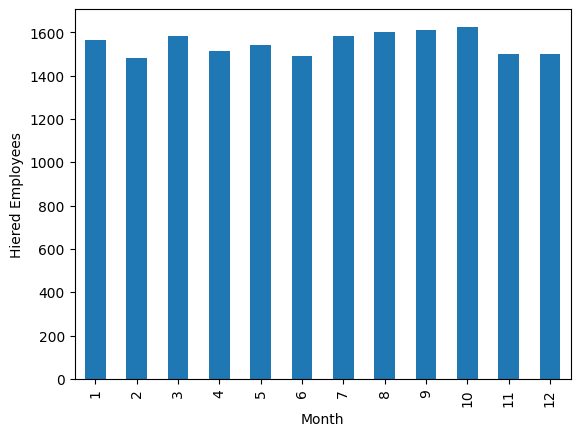

In [82]:
print(f"Min date {data['Date of Joining'].min()}")
print(f"Max date {data['Date of Joining'].max()}")
data_month=data.copy()

data_month['Date of Joining']=data_month['Date of Joining'].astype("datetime64[ns]")
data_month["Date of Joining"].groupby(data_month['Date of Joining'].dt.month).count().plot(kind="bar",xlabel='Month',ylabel='Hiered Employees')

In [83]:
data_2008=pd.to_datetime(["2008-01-01"]*len(data))
data["Days"]=data['Date of Joining'].astype("datetime64[ns]").sub(data_2008).dt.days
data.Days

,Days
0,273
1,334
3,307
4,205
5,330
...,...
22743,349
22744,147
22746,18
22748,9


In [84]:
numeric_data=data.select_dtypes(include=['number'])
correlation=numeric_data.corr()['Burn Rate']
print(correlation)

Designation             0.736412
Resource Allocation     0.855005
Mental Fatigue Score    0.944389
Burn Rate               1.000000
Days                    0.000309
Name: Burn Rate, dtype: float64


In [85]:
data.corr(numeric_only=True)['Burn Rate'][:]

,Burn Rate
Designation,0.736412
Resource Allocation,0.855005
Mental Fatigue Score,0.944389
Burn Rate,1.000000
Days,0.000309


In [86]:
data=data.drop(['Date of Joining','Days'],axis=1)

In [87]:
data.head()

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,Female,Service,No,2,3.0,3.8,0.16
1,Male,Service,Yes,1,2.0,5.0,0.36
3,Male,Service,Yes,1,1.0,2.6,0.20
4,Female,Service,No,3,7.0,6.9,0.52
5,Male,Product,Yes,2,4.0,3.6,0.29


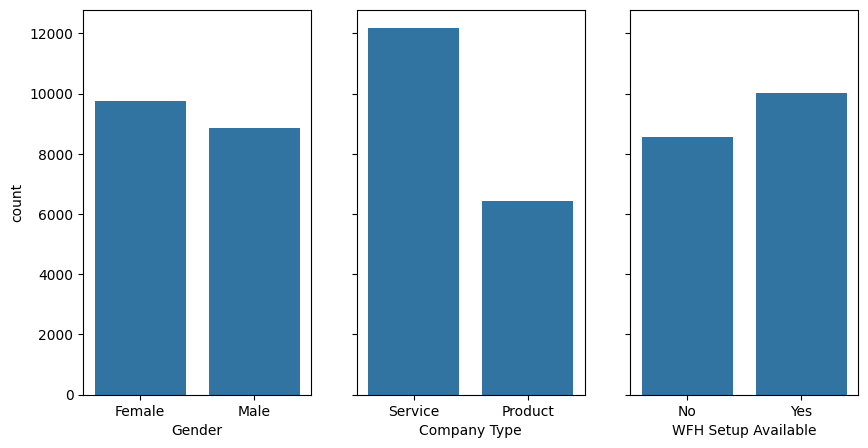

In [88]:
cat_columns=data.select_dtypes(object).columns
fig, ax=plt.subplots(nrows=1,ncols=len(cat_columns),sharey=True,figsize=(10,5))
for i,c in enumerate(cat_columns):
  sns.countplot(x=c,data=data,ax=ax[i])
plt.show()

One Hot Encoding for categorial features

In [89]:
if all(col in data.columns for col in['Company Type','WFH Setup Available','Gender']):
  data=pd.get_dummies(data, columns=['Company Type','WFH Setup Available','Gender'],drop_first=True)
  data.head()
  encoded_columns=data.columns
else:
  print("Error: One or more of the specified columns are not present in the DataFrame.")
  print(data.columns)

In [90]:
data

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Company Type_Service,WFH Setup Available_Yes,Gender_Male
0,2,3.0,3.8,0.16,True,False,False
1,1,2.0,5.0,0.36,True,True,True
3,1,1.0,2.6,0.20,True,True,True
4,3,7.0,6.9,0.52,True,False,False
5,2,4.0,3.6,0.29,False,True,True
...,...,...,...,...,...,...,...
22743,1,3.0,6.0,0.48,False,True,False
22744,3,7.0,6.2,0.54,False,False,True
22746,3,6.0,6.7,0.59,False,True,False
22748,2,5.0,5.9,0.52,True,False,False


Preprocessing


In [91]:
y = data['Burn Rate']
X=data.drop('Burn Rate',axis=1)

In [92]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,shuffle=True,random_state=1)
scaler=StandardScaler()
scaler.fit(X_train)
X_train=pd.DataFrame(scaler.transform(X_train),index=X_train.index,columns=X_train.columns)
X_test=pd.DataFrame(scaler.transform(X_test),index=X_test.index,columns=X_test.columns)

In [93]:
X_train

,Designation,Resource Allocation,Mental Fatigue Score,Company Type_Service,WFH Setup Available_Yes,Gender_Male
8977,0.723327,0.250185,-0.061773,0.724706,-1.082297,1.051505
14115,-0.159330,0.250185,-0.941481,0.724706,-1.082297,-0.951018
8797,0.723327,0.250185,0.973179,0.724706,-1.082297,-0.951018
1173,-1.041987,-1.214568,-0.579248,-1.379869,-1.082297,-0.951018
1941,-0.159330,0.738436,1.180169,-1.379869,0.923961,1.051505
...,...,...,...,...,...,...
13453,0.723327,1.226687,1.645897,-1.379869,0.923961,-0.951018
21179,0.723327,0.250185,-1.044976,0.724706,0.923961,1.051505
6327,0.723327,0.250185,0.093470,0.724706,-1.082297,1.051505
14933,-0.159330,0.250185,0.714441,0.724706,-1.082297,1.051505


In [94]:
y_train

,Burn Rate
8977,0.41
14115,0.34
8797,0.61
1173,0.35
1941,0.61
...,...
13453,0.78
21179,0.30
6327,0.42
14933,0.54


Model Building

 Linear Regression

In [95]:
linear_regression_model=LinearRegression()
linear_regression_model.fit(X_train, y_train)

LinearRegression()

In [105]:
print("Linear Regression Model Performance Metrics:\n")
#make prediction on the test set
y_pred=linear_regression_model.predict(X_test)

#calculate mean squared error
mse=mean_squared_error(y_test,y_pred)
print("Mean Squared Error:",mse)

#Calculate root mean squared error
rmse=mean_squared_error(y_test,y_pred)**0.5
print("Root mean squared Error:",rmse)

#Calculate mean absolute error
mae=mean_absolute_error(y_test,y_pred)
print("Mean absolute Error:",mae)

#Calculate R-Squared score
r2=r2_score(y_test,y_pred)
print("R2 squared score:",r2)

Linear Regression Model Performance Metrics:

Mean Squared Error: 0.0031569779113610717
Root mean squared Error: 0.0561869905882231
Mean absolute Error: 0.04595032032644773
R2 squared score: 0.918822674247248
